In [1]:
# Load necessary libraries
library(ADM)
source("./functions.R")

Loading required package: Matrix


Attaching package: ‘uwot’


The following object is masked from ‘package:umap’:

    umap


Loading required package: MASS

Loading required package: survival


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Package 'mclust' version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract


The following object is masked from ‘package:igraph’:

    crossing


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack



Attaching package: ‘dplyr’


The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The follo

In [2]:
# Set dataset name
dataset = "Brain5k"  # Options: Gutierrez, Oihane, Quake, Brain5k, mir, Spleen, metabolism, gene

# Load data
dataload = dataloader(dataset)
dat = dataload$dat
info = dataload$info
k = length(unique(info))
label_mapping <- get_mapping(dataset)
print("load data successfully!")

# Execute candidate visualization methods
candidate.out = candidate.visual(dat, dim = 3, method=c("PCA", "MDS", "iMDS", "Sammon", "HLLE", "Isomap", 
                                                  "kPCA", "LEIM", "UMAP", "tSNE","PHATE","KEF"),tsne.perplexity = c(10, 30))

print("Indivadual methods completed!!")
# Extract results
e<-candidate.out[[1]]  # Visualization results
names_list = candidate.out[[2]]  # List of method names

[1] "load data successfully!"
[1] 2317 2000
[1] "PCA calculating..."
[1] "MDS calculating..."
[1] "iMDS calculating..."
initial  value 42.409252 
iter   5 value 35.624659
iter  10 value 29.383482
iter  15 value 25.616665
iter  20 value 22.765721
iter  25 value 22.035397
final  value 20.925084 
converged
[1] "Sammon calculating..."
Initial stress        : 0.64539
stress after   8 iters: 0.56101
[1] "HLLE calculating..."


2024-10-16 18:55:40.447631: Finding nearest neighbors

2024-10-16 18:55:51.795107: Calculating Hessian



'as(<dsCMatrix>, "dgCMatrix")' is deprecated.
Use 'as(., "generalMatrix")' instead.
See help("Deprecated") and help("Matrix-deprecated").

2024-10-16 18:56:17.942188: Embedding

Eigenvalues:  4.720819e-04  4.028333e-04  3.114518e-04 -2.977663e-15

2024-10-16 18:56:17.983505: DONE



[1] "Isomap calculating..."


2024-10-16 18:56:18.03396: Isomap START

2024-10-16 18:56:18.036738: constructing knn graph

2024-10-16 18:56:29.395961: calculating geodesic distances

2024-10-16 18:56:32.180228: Classical Scaling



[1] "kPCA calculating..."


2024-10-16 18:56:32.367271: Calculating kernel PCA

2024-10-16 18:56:37.668599: Trying to calculate reverse

2024-10-16 18:56:45.838755: DONE



[1] "kPCA calculating..."


2024-10-16 18:56:45.88311: Calculating kernel PCA

2024-10-16 18:56:51.383889: Trying to calculate reverse

2024-10-16 18:56:59.492599: DONE



[1] "LEIM calculating..."


2024-10-16 18:56:59.528147: Creating weight matrix

2024-10-16 18:57:11.57426: Eigenvalue decomposition

Eigenvalues:  6.240808e-01  6.075812e-01  5.852422e-01 -8.768316e-16

2024-10-16 18:57:11.667097: DONE



[1] "UMAP calculating..."
[1] "UMAP calculating..."
[1] "tSNE calculating..."
[1] "tSNE calculating..."
[1] "PHATE calculating..."
[1] "PHATE calculating..."
[1] "KEF calculating..."
NULL
[1] "Indivadual methods completed!!"


In [3]:
# set.seed(2024)
# Execute meta-spec visualization
ensemble.out = ensemble.viz(e, names(e))
print("meta-spec completed!!")

[1] "1000 samples done!"
[1] "2000 samples done!"
[1] "meta-spec completed!!"


In [4]:
# Execute ADM method
adm.out = adm(e,distr.template = "combine")
print("ADM completed!!")

[1] "working on ADM..."


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...
Building distance matrix...


Buildi

[1] "ADM completed!!"


In [5]:
# Define color list for visualization
color_list =c("#FB6A4A","#54278F","#006635","#3182BD","#DE2D26","#72A34F","#5D7AD3", "#756BB1","#FCAE91","#fe87ac","#AFABAB","#67A9CF","#CBC9E2","#4d982e","#E6873E","#545454","#aa3474","#ee8c7d","#2e5fa1","#FDD0A3","#C22F2F","#036f73")

# Process and visualize meta-method results
result = process_and_visualize_meta_methods(adm.out, ensemble.out,info, k, color_list)

[1] "Running R version:4.3.1"
****** meta-spec ******
        ARI       NMI
1 0.3453479 0.5018691
****** ADM ******
        ARI       NMI
1 0.4437881 0.5634869


In [6]:
result$ARI_list

[[1]]
        ARI       NMI
1 0.3453479 0.5018691

[[2]]
        ARI       NMI
1 0.4437881 0.5634869

[[1]]

[[2]]
NULL

[[3]]


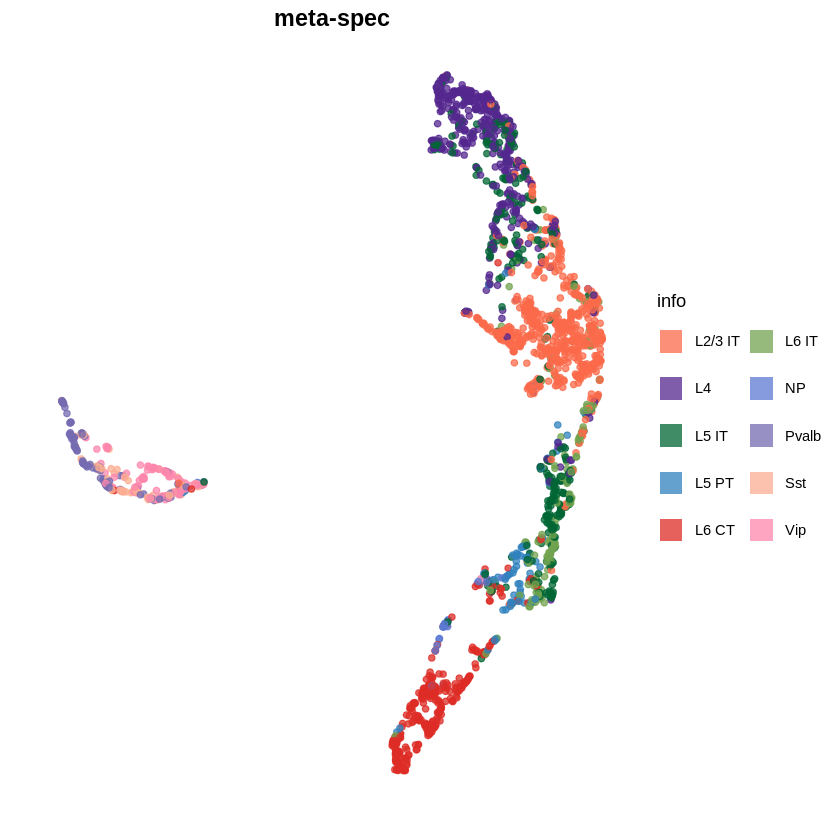

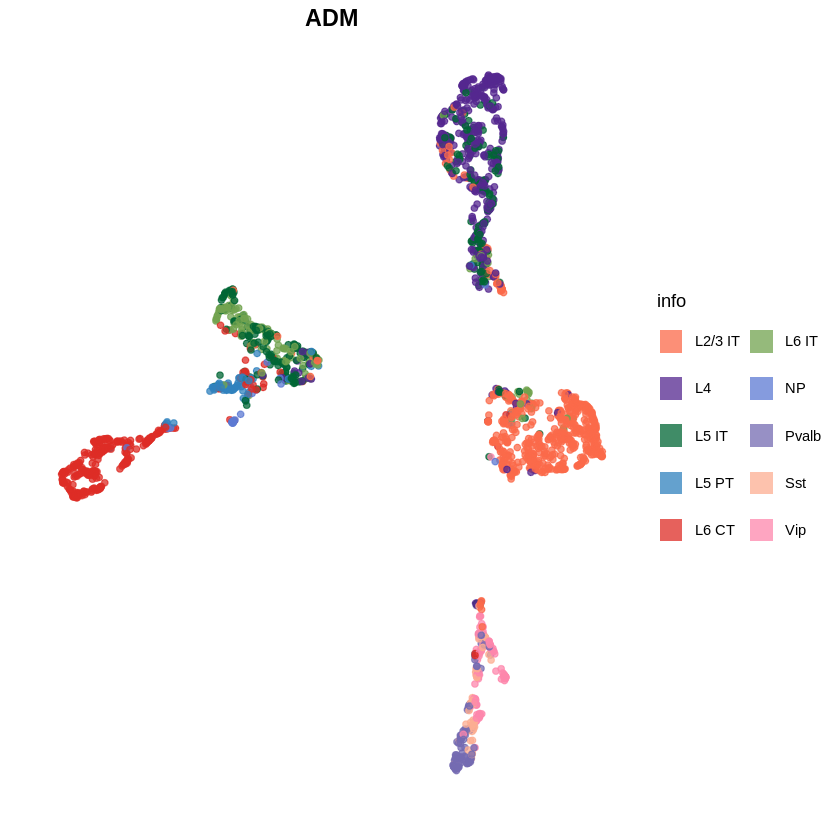

In [7]:
result$plot

****** PCA ******
         ARI       NMI
1 0.08273379 0.2250387
Average Silhouette Width: 0.3624139 

****** MDS ******
        ARI       NMI
1 0.4390448 0.5432764
Average Silhouette Width: 0.3097955 



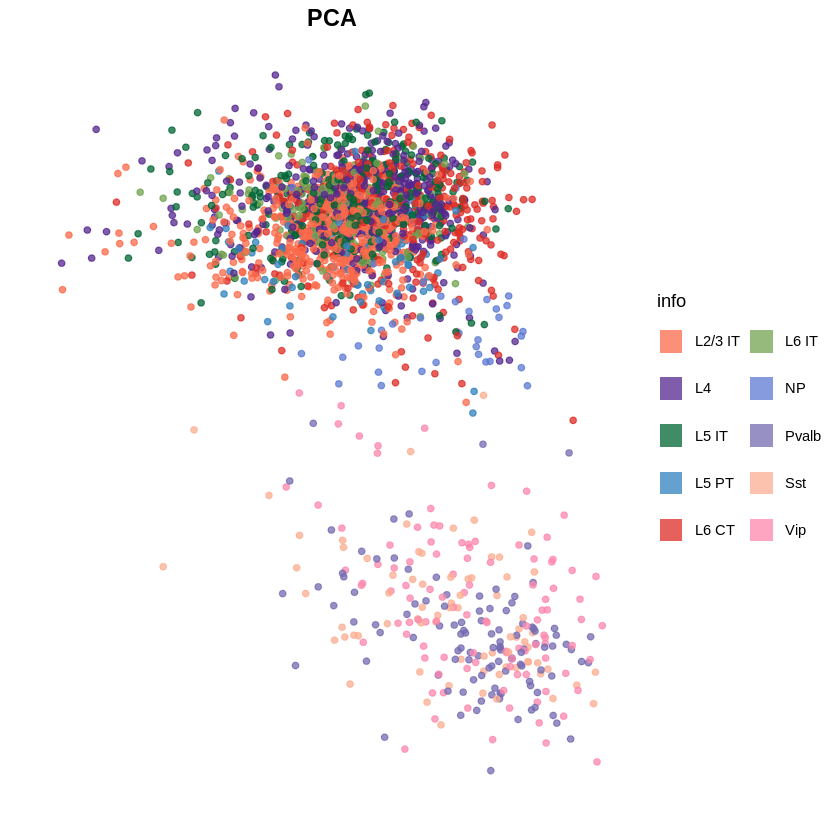

****** iMDS ******
        ARI       NMI
1 0.2198263 0.2910576
Average Silhouette Width: 0.3917184 



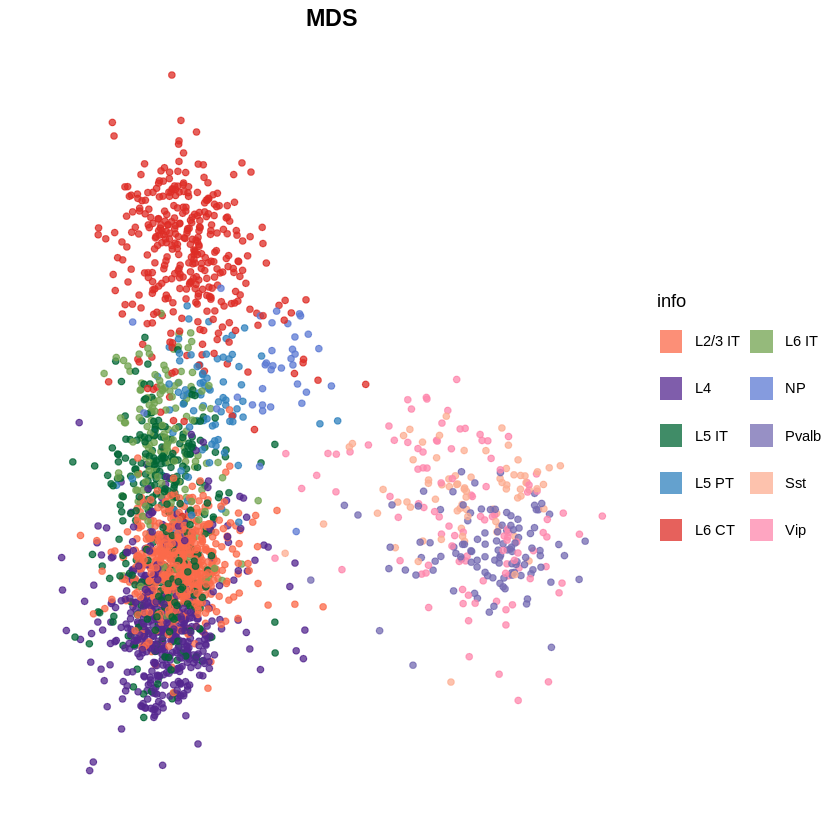

****** Sammon ******
        ARI       NMI
1 0.4673344 0.5690062
Average Silhouette Width: 0.3445656 



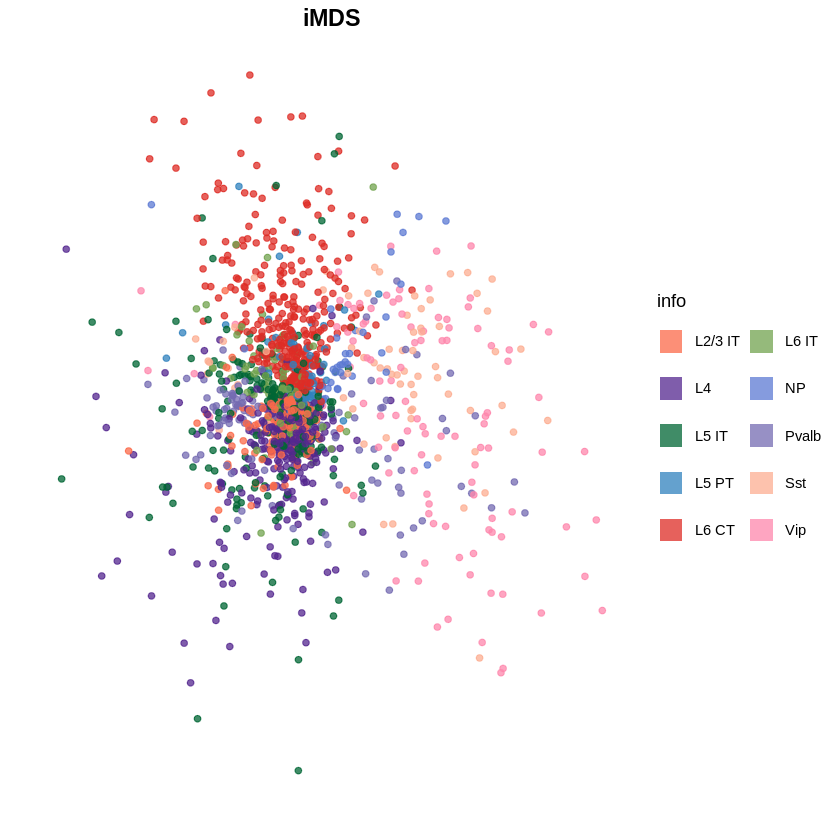

****** HLLE ******
         ARI        NMI
1 0.03211589 0.03672571
Average Silhouette Width: 0.7488569 



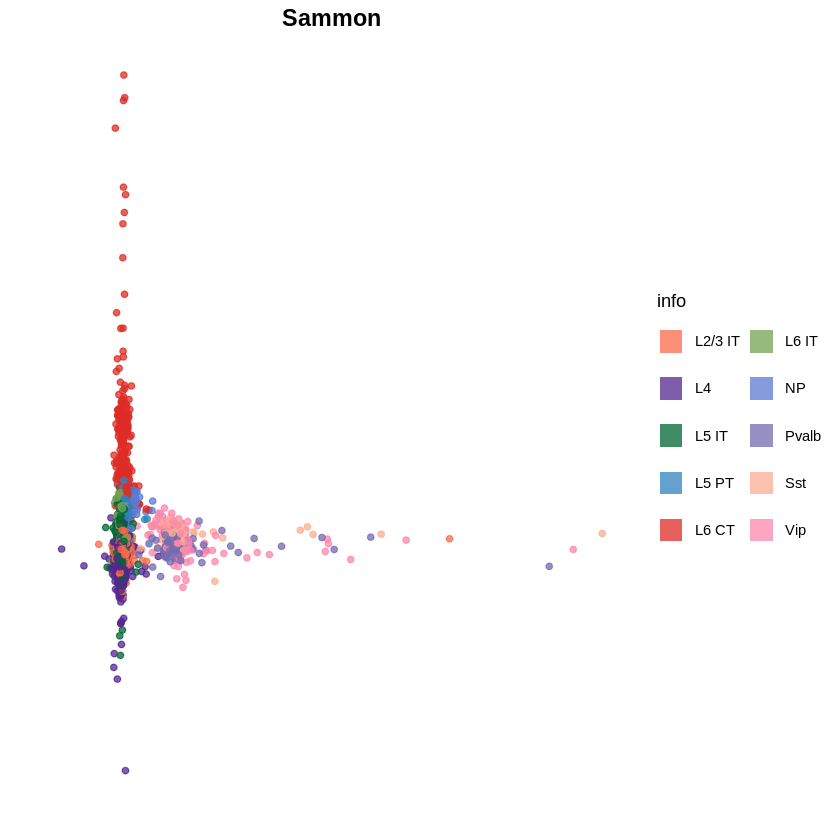

****** Isomap ******
        ARI       NMI
1 0.2971935 0.3544587
Average Silhouette Width: 0.2790873 



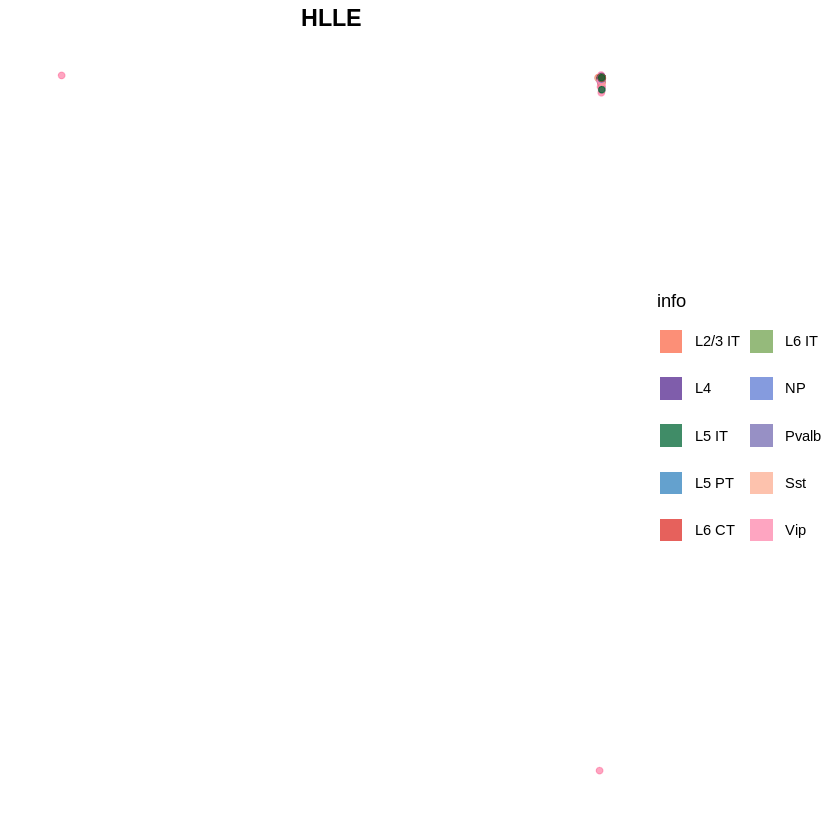

****** kPCA1 ******
        ARI       NMI
1 0.4757681 0.5281921
Average Silhouette Width: 0.3680834 



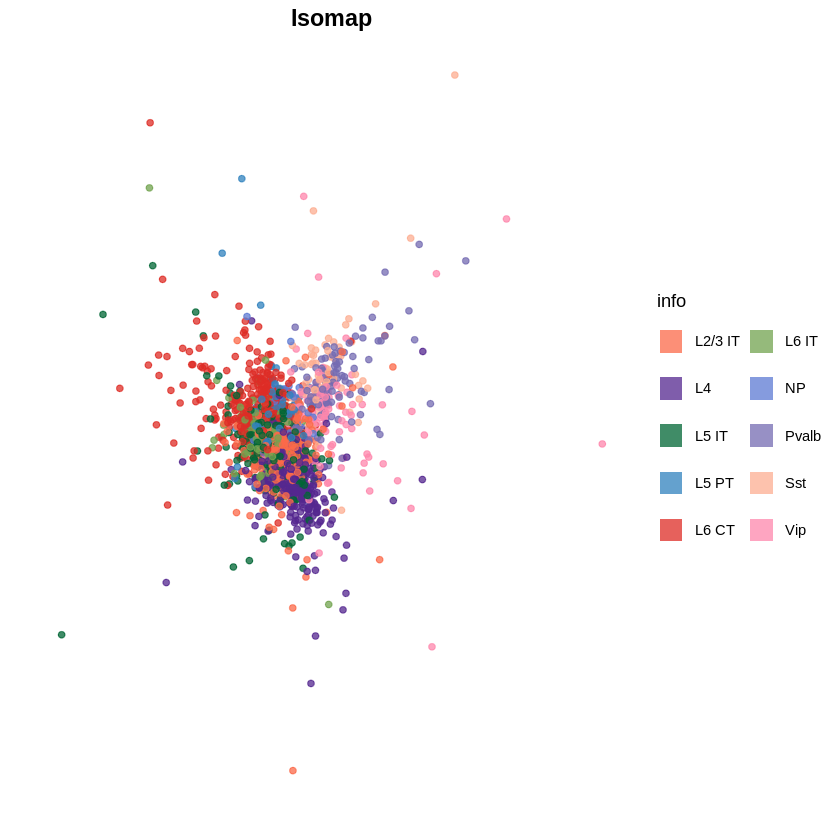

****** kPCA2 ******
       ARI      NMI
1 0.428407 0.497126
Average Silhouette Width: 0.340626 



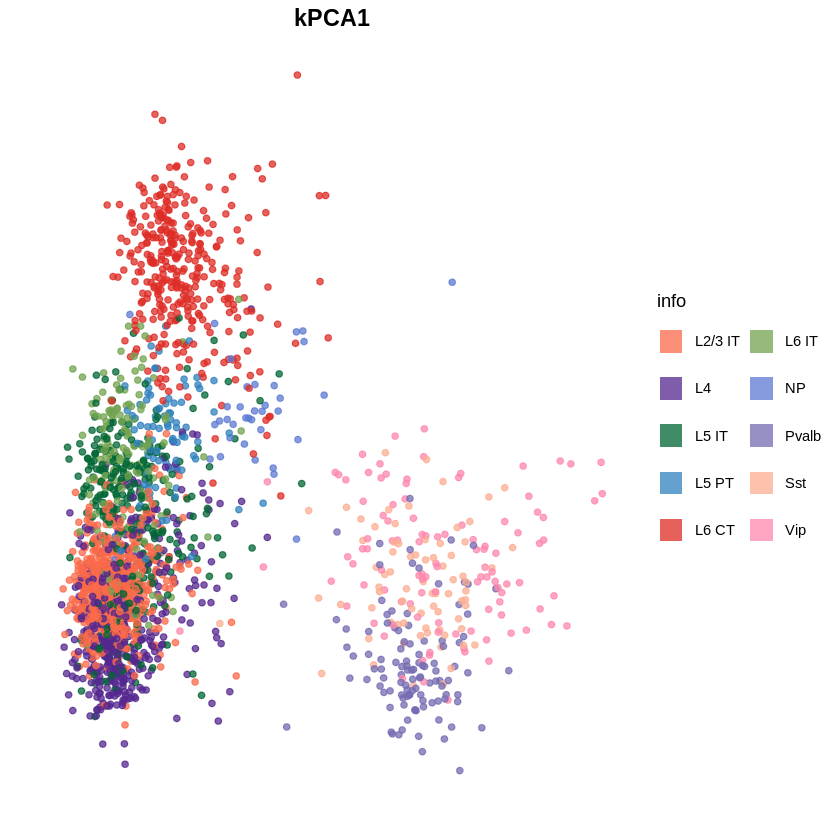

****** LEIM ******
        ARI       NMI
1 0.2786257 0.3715964
Average Silhouette Width: 0.3478085 



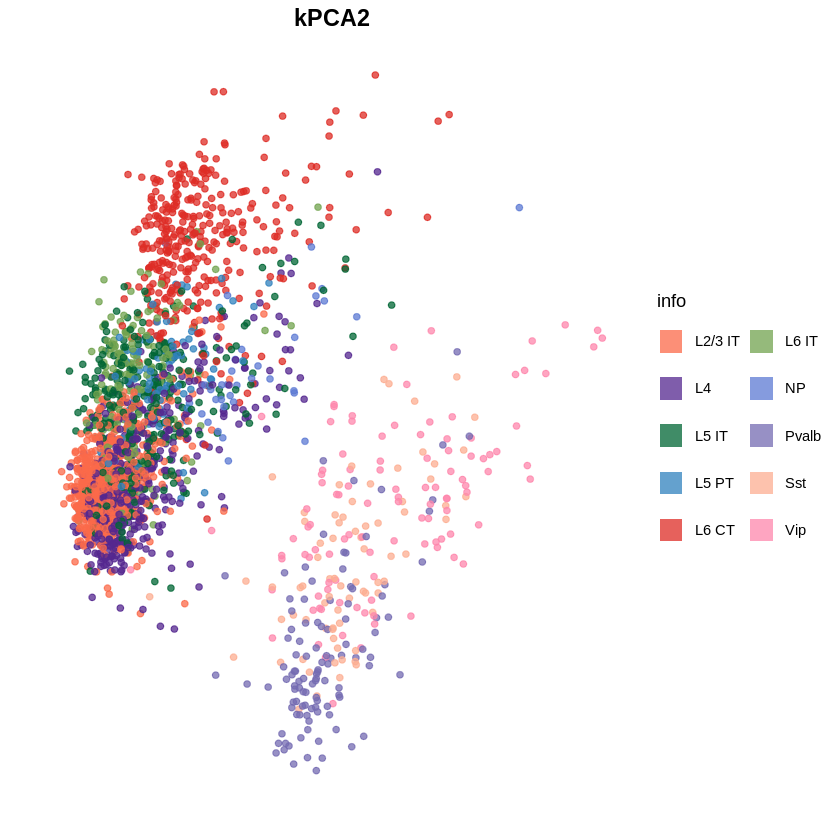

****** UMAP1 ******
        ARI       NMI
1 0.1357065 0.2184533
Average Silhouette Width: 0.2934744 



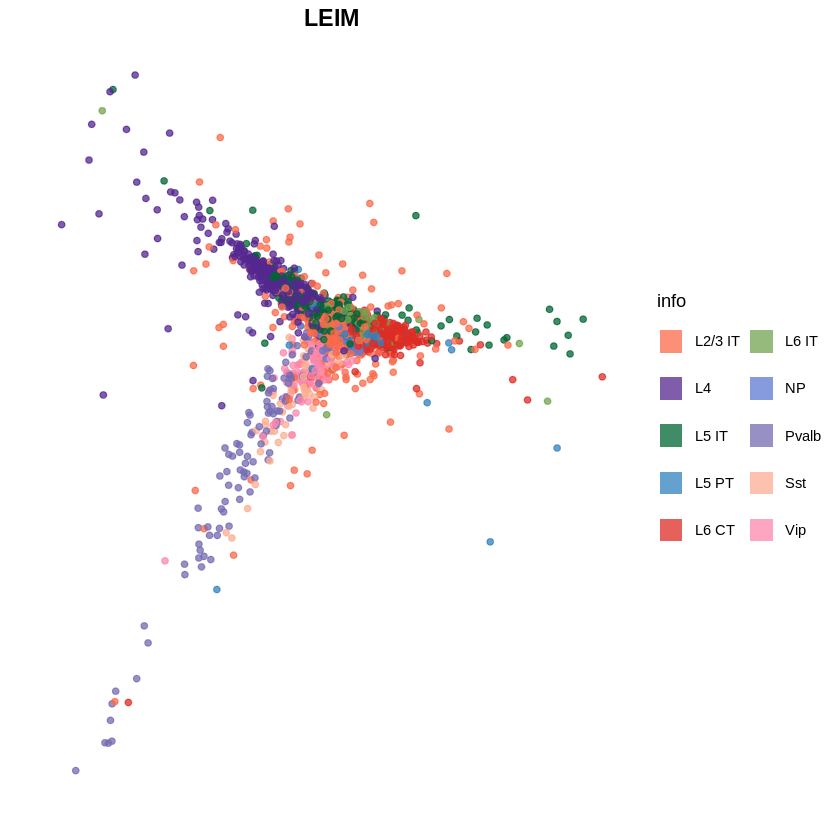

****** UMAP2 ******
        ARI       NMI
1 0.1549026 0.2335923
Average Silhouette Width: 0.2853789 



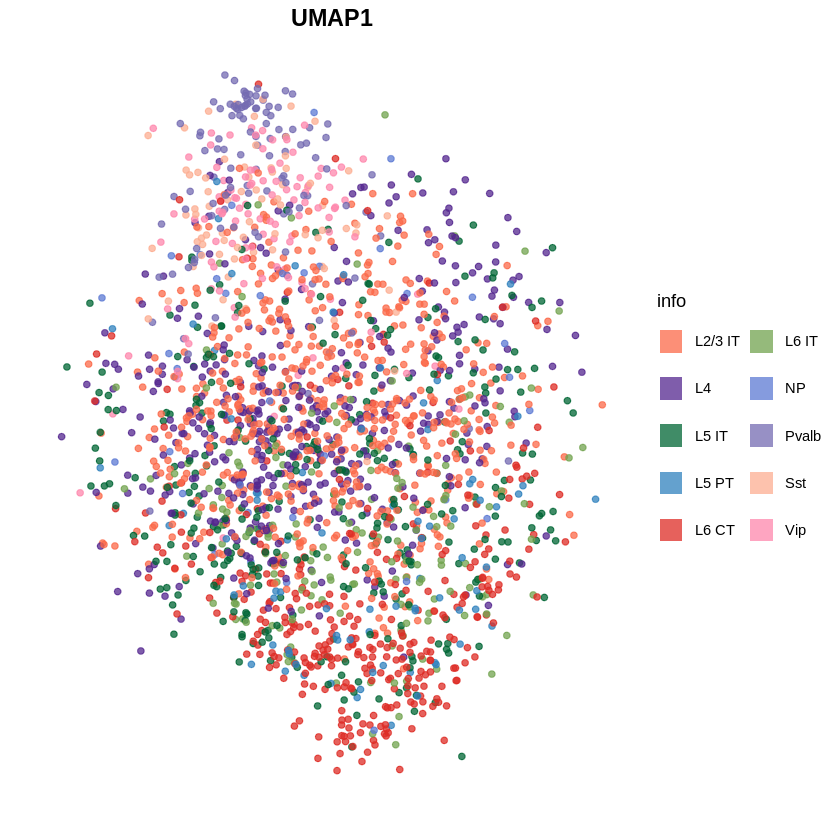

****** tSNE1 ******
        ARI      NMI
1 0.1867714 0.280944
Average Silhouette Width: 0.2812535 



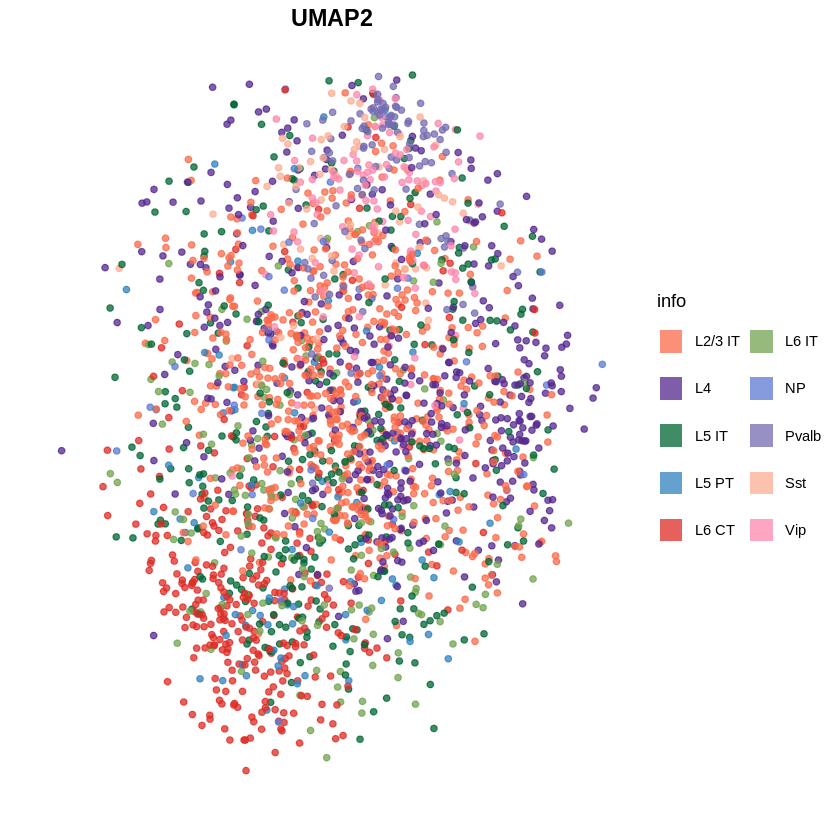

****** tSNE2 ******
        ARI       NMI
1 0.2578995 0.3414289
Average Silhouette Width: 0.2591864 



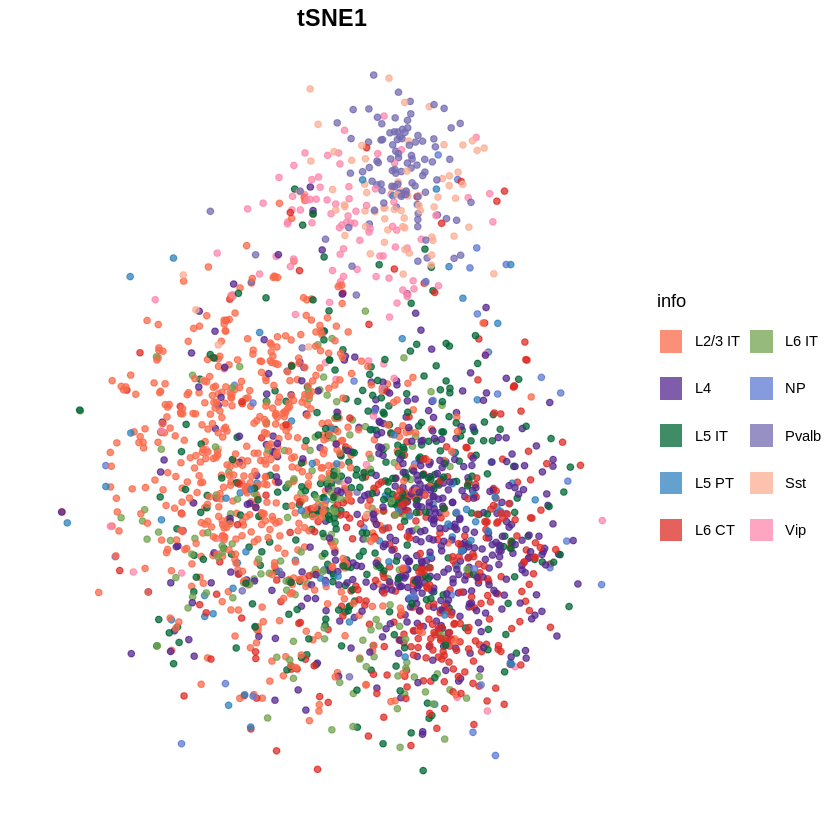

****** PHATE1 ******
        ARI      NMI
1 0.4712387 0.531161
Average Silhouette Width: 0.5031641 



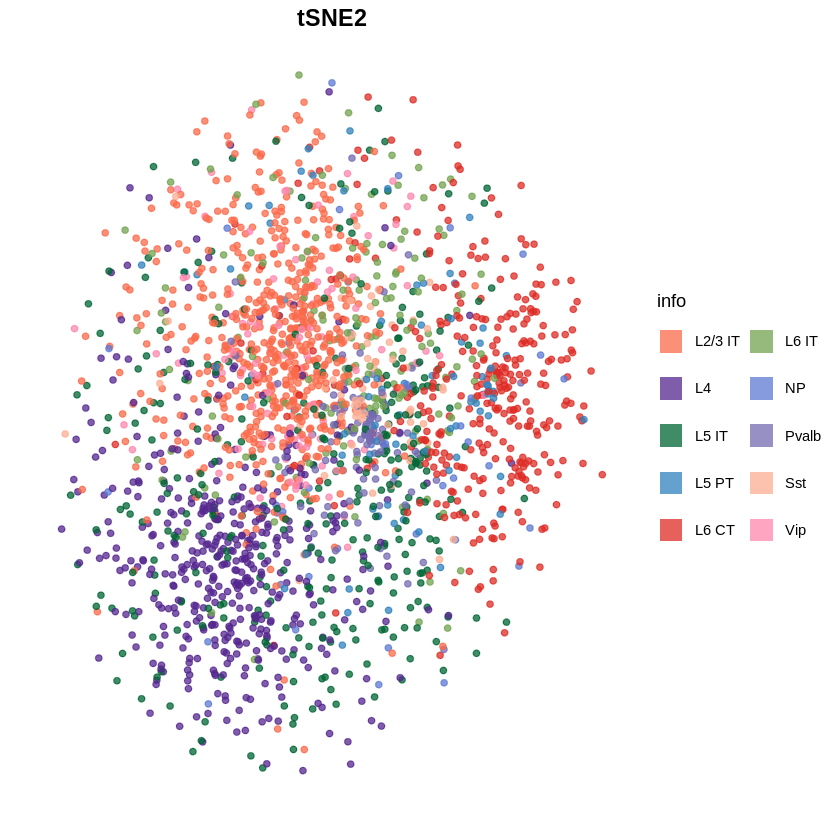

****** PHATE2 ******
        ARI       NMI
1 0.4550085 0.5224619
Average Silhouette Width: 0.5085338 



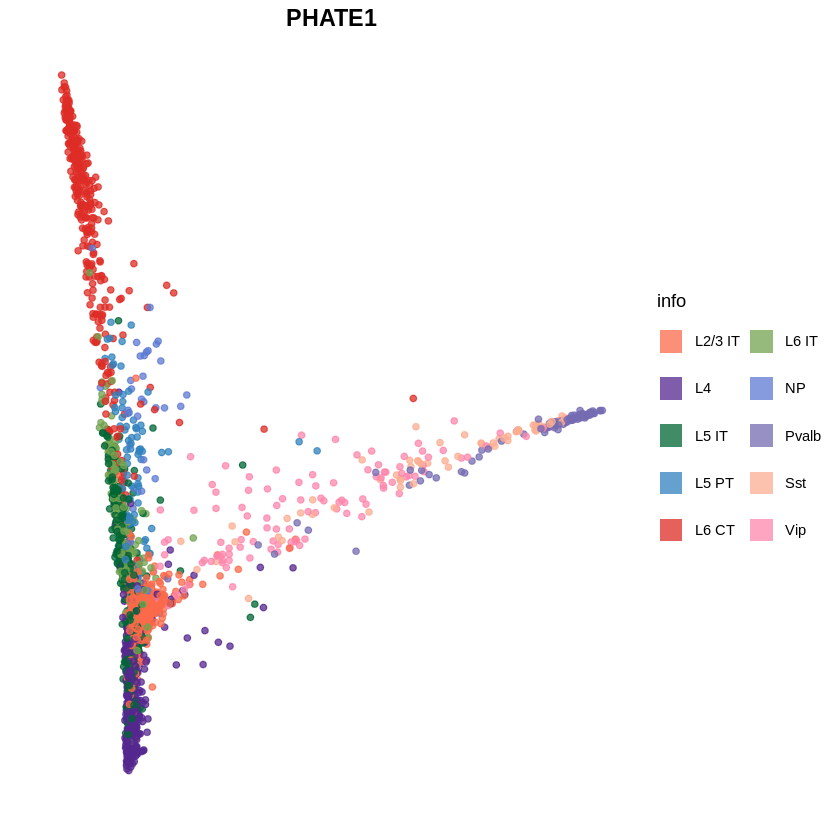

****** KEF ******
        ARI       NMI
1 0.2830524 0.4213016
Average Silhouette Width: 0.3709351 



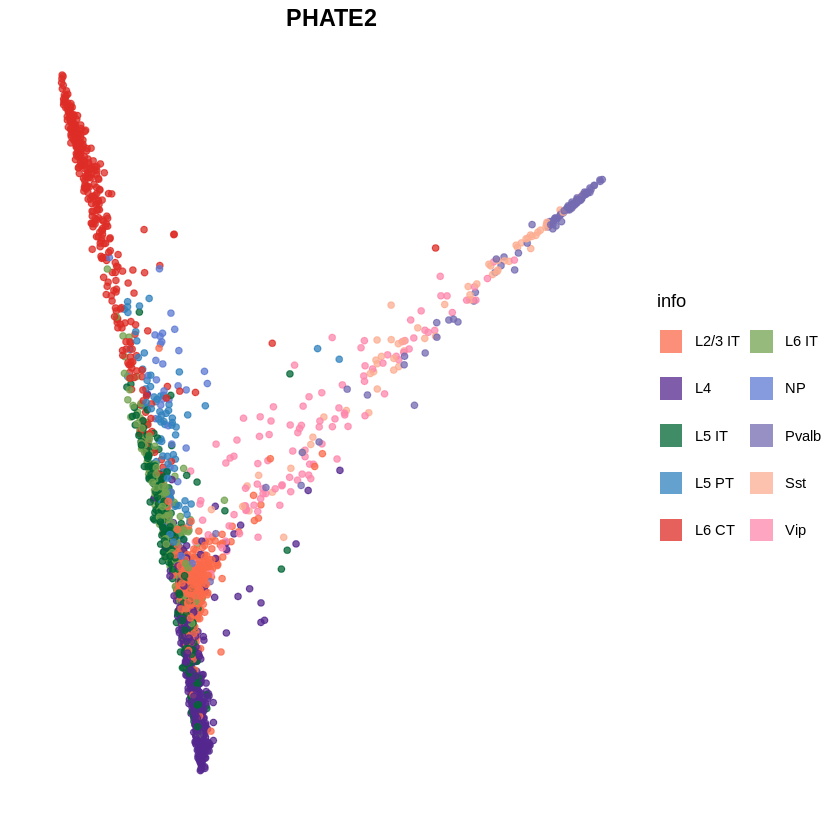

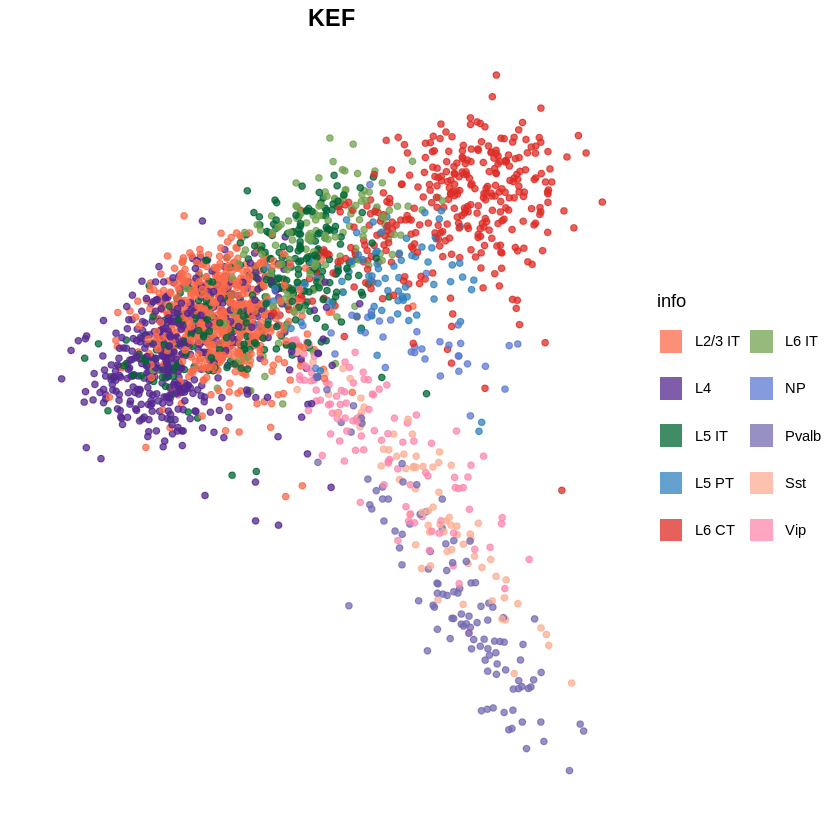

In [8]:
# Visualize individual method results
ind_result = visualize_individual_methods(e, names_list, info, color_list, k)

$plot

$ari
[1] 0.08273379

$nmi
[1] 0.2250387

$silhouette
[1] 0.3624139


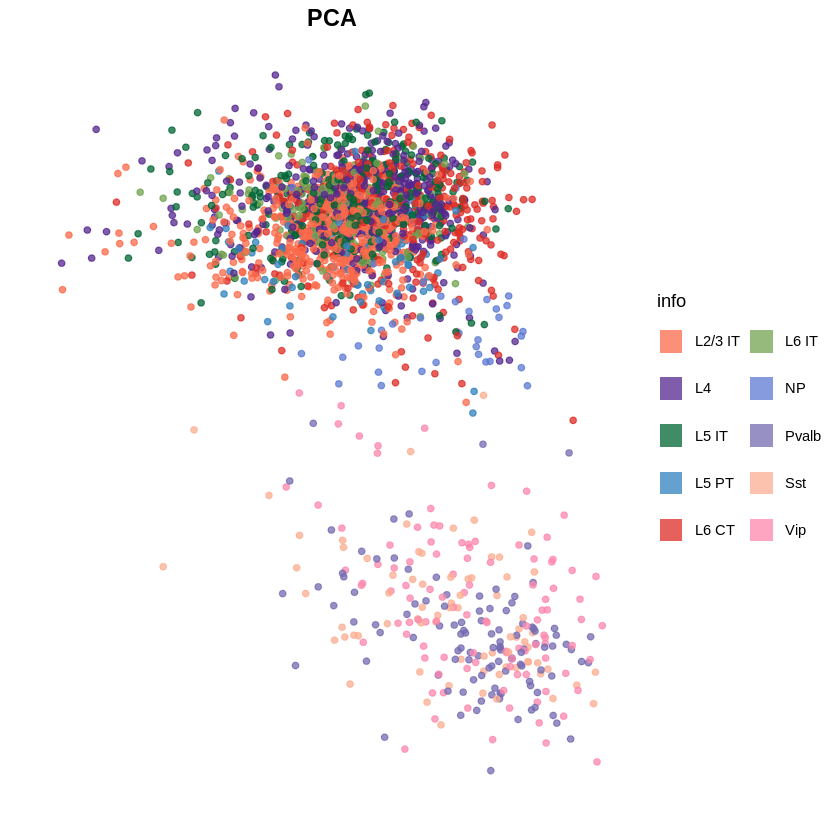

In [9]:
# View results
# Use the following commands to view numerical results and plots for each method:
# ind_result[[1]]$plot  # Plot
# ind_result[[1]]$ari   # ARI value
# ind_result[[1]]$nmi   # NMI value
# ind_result[[1]]$silhouette  # Silhouette coefficient

ind_result[[1]]